<a href="https://colab.research.google.com/github/douglassesi/MachineLearning/blob/main/Classifica%C3%A7%C3%A3o/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalação da biblioteca Graphviz

In [1]:
pip install graphviz

#Import das bibliotecas

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz, plot_tree
import pydotplus
from IPython.display import display
import graphviz
from sklearn import tree
from sklearn.metrics import classification_report, plot_confusion_matrix
import os
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


#Carregando o arquivo Heart Disease

In [3]:
!git clone https://github.com/douglassesi/MachineLearning

fatal: destination path 'MachineLearning' already exists and is not an empty directory.


In [4]:
os.chdir("/content/MachineLearning/Classificação/src")

In [5]:
filename = 'heart.csv'

df_heart=  pd.read_csv(filename, sep=",")
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


##Pré-análise

In [6]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#Pré-processamento

##Separando os dados Categóricos

In [7]:
cat_heart = pd.get_dummies(data=df_heart,
                     columns=['cp','slope','ca','thal'], drop_first=True)


###Drop das colunas categóricas antes do tratamento

In [8]:
drop_df_heart=df_heart.drop(['cp','slope','ca','thal'], axis=1, inplace=True)

##Concatenando os dados Categóricos com os dados numéricos

In [9]:
heart_dmy = pd.concat([drop_df_heart,cat_heart],axis=1)
heart_dmy

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,cp_1,cp_2,cp_3,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,1,0,0,1,0,0,0,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,1,0,1,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,1,1,0,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,1,1,0,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,1,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,0,0,0,1,0,0,0,0,0,0,0,1
299,45,1,110,264,0,1,132,0,1.2,0,0,0,1,1,0,0,0,0,0,0,0,1
300,68,1,144,193,1,1,141,0,3.4,0,0,0,0,1,0,0,1,0,0,0,0,1
301,57,1,130,131,0,1,115,1,1.2,0,0,0,0,1,0,1,0,0,0,0,0,1


##Separação das features

In [10]:
y = heart_dmy['target'].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
X = heart_dmy.drop(['target'], axis=1).values
X

array([[ 63.,   1., 145., ...,   1.,   0.,   0.],
       [ 37.,   1., 130., ...,   0.,   1.,   0.],
       [ 41.,   0., 130., ...,   0.,   1.,   0.],
       ...,
       [ 68.,   1., 144., ...,   0.,   0.,   1.],
       [ 57.,   1., 130., ...,   0.,   0.,   1.],
       [ 57.,   0., 130., ...,   0.,   1.,   0.]])

#Processamento

##Separação da massa de teste e treino

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=30)

##Aplicação do modelo de Árvore de Decisão 

In [13]:
classificador = DecisionTreeClassifier(max_depth=4)
classificador.fit(X_train, y_train)
y_pred = classificador.predict(X_test)

In [14]:
cm = confusion_matrix(y_test,y_pred)

###Resultado

In [15]:
print(classification_report(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72        40
           1       0.79      0.75      0.77        51

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91

0.7472527472527473


###Plot da Árvore de decisão

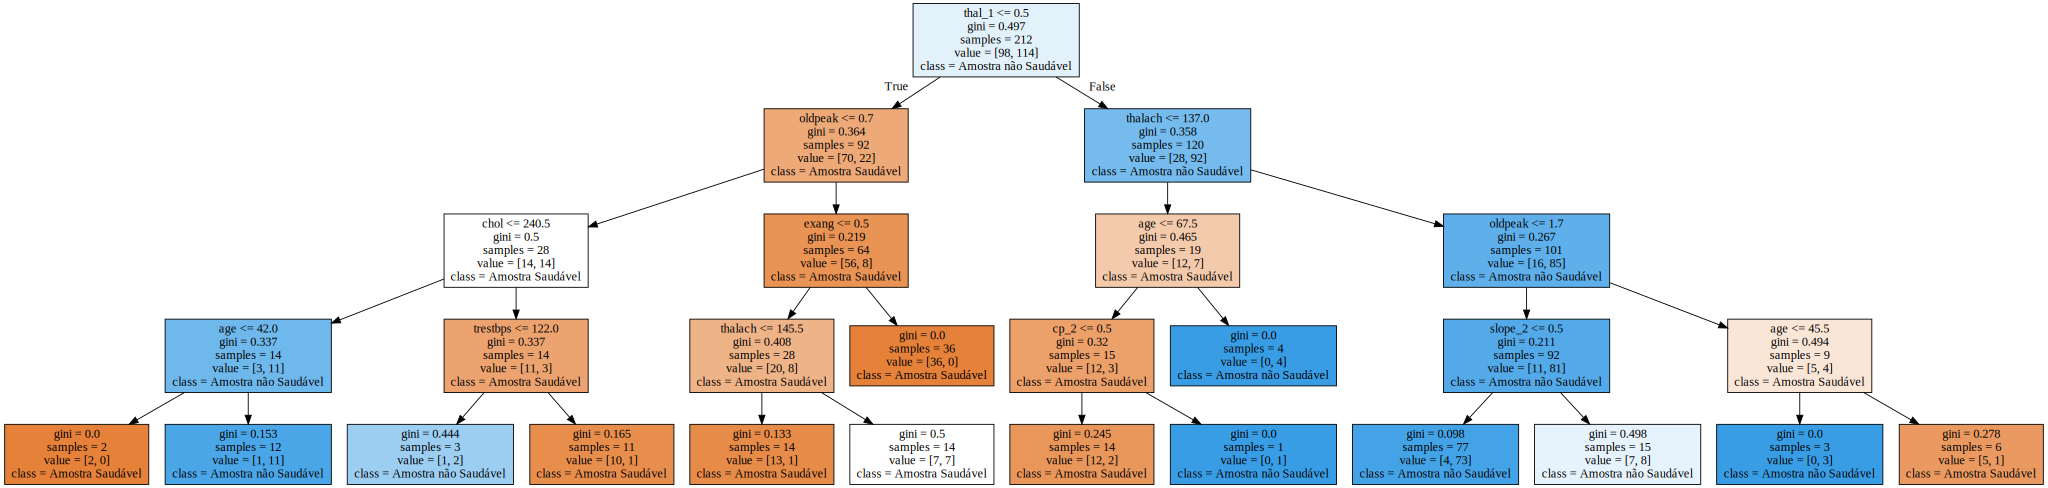

In [16]:
display(
    graphviz.Source(tree.export_graphviz(
        classificador, 
        feature_names=heart_dmy.columns.values[0:21], 
        class_names=['Amostra Saudável','Amostra não Saudável'],  
        filled=True)))

In [17]:
std_slc = StandardScaler()

In [18]:
classif_tree = DecisionTreeClassifier()

In [19]:
pipe_tree = Pipeline(steps=[('std_slc', std_slc),
                       ('classif_tree', classif_tree)])

In [20]:
criterion = ['gini', 'entropy']
max_depth = range(1,20)
random_state = [32,42]

In [21]:
parameters_tree = dict(classif_tree__criterion=criterion,
                  classif_tree__max_depth=max_depth,
                  classif_tree__random_state=random_state)

In [22]:
tree_GS = GridSearchCV(pipe_tree, parameters_tree)
tree_model = tree_GS.fit(X_train, y_train)

In [23]:
y_pred_tree = tree_model.predict(X_test)
cm_tree = confusion_matrix(y_test,y_pred_tree)

In [24]:
tree_model.best_estimator_

Pipeline(memory=None,
         steps=[('std_slc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classif_tree',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=4,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=42,
                                        splitter='best'))],
         verbose=False)

              precision    recall  f1-score   support

           0       0.70      0.75      0.72        40
           1       0.79      0.75      0.77        51

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91

0.7472527472527473


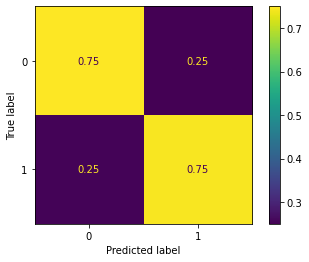

In [25]:
plot_confusion_matrix(tree_model, X_test, y_test, normalize = 'true')
print(classification_report(y_test,y_pred_tree))
print(metrics.accuracy_score(y_test,y_pred_tree))

In [26]:
classif_xg = XGBClassifier()

In [27]:
pipe_xg = Pipeline(steps=[('std_slc', std_slc),
                       ('classif_xg', classif_xg)])

In [28]:
learning_rate = [0.001,0.01,0.1,1]

In [29]:
parameters_xg = dict(classif_xg__max_depth=max_depth,
                  classif_xg__learning_rate=learning_rate,
                  classif_xg__random_state=random_state)

In [30]:
xg_GS = GridSearchCV(pipe_xg, parameters_xg)
xg_model = xg_GS.fit(X_train, y_train)

In [31]:
print(xg_model.best_estimator_)

Pipeline(memory=None,
         steps=[('std_slc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classif_xg',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=32,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)


In [32]:
y_pred_xg = xg_model.predict(X_test)
cm_xg = confusion_matrix(y_test,y_pred_xg)

              precision    recall  f1-score   support

           0       0.79      0.82      0.80        40
           1       0.86      0.82      0.84        51

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

0.8241758241758241


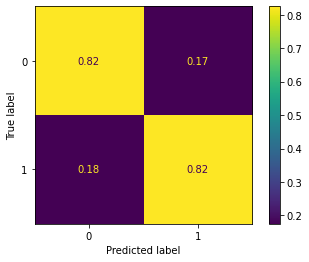

In [33]:
plot_confusion_matrix(xg_model, X_test, y_test, normalize = 'true')
print(classification_report(y_test,y_pred_xg))
print(metrics.accuracy_score(y_test,y_pred_xg))

In [34]:
classif_KNN = KNeighborsClassifier()

In [35]:
pipe_KNN = Pipeline(steps=[('std_slc', std_slc),
                       ('classif_KNN', classif_KNN)])

In [36]:
weights = ['uniform', 'distance']
n_neighbors = range(1,26)
p = [1,2]

In [37]:
parameters_KNN = dict(classif_KNN__weights=weights,
                  classif_KNN__n_neighbors=n_neighbors,
                  classif_KNN__p=p)

In [38]:
KNN_GS = GridSearchCV(pipe_KNN, parameters_KNN)
KNN_model = KNN_GS.fit(X_train, y_train)

In [39]:
y_pred_KNN = KNN_model.predict(X_test)

In [40]:
cm_KNN = confusion_matrix(y_test,y_pred_KNN)

In [41]:
KNN_model.best_estimator_

Pipeline(memory=None,
         steps=[('std_slc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classif_KNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=19, p=1,
                                      weights='uniform'))],
         verbose=False)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        40
           1       0.90      0.86      0.88        51

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

0.8681318681318682


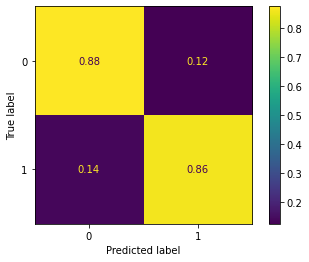

In [42]:
plot_confusion_matrix(KNN_model, X_test, y_test, normalize = 'true')

print(classification_report(y_test, y_pred_KNN))
print(metrics.accuracy_score(y_test, y_pred_KNN))

In [43]:
classif_random_forest = RandomForestClassifier()

In [44]:
pipe_random = Pipeline(steps=[('std_slc', std_slc),
                       ('classif_random_forest', classif_random_forest)])

In [45]:
max_depth = [2,4,6,8,10,12]
random_state = [32,42]
n_estimators= range(10,10,200)

In [46]:
parameters_random_forester = dict(classif_random_forest__n_estimators=n_estimators,
                  classif_random_forest__max_depth=max_depth,
                  classif_random_forest__random_state=random_state)

In [47]:
random_forest_model = classif_random_forest.fit(X_train, y_train)

In [48]:
y_pred_random_model = random_forest_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        40
           1       0.83      0.76      0.80        51

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91

0.7802197802197802


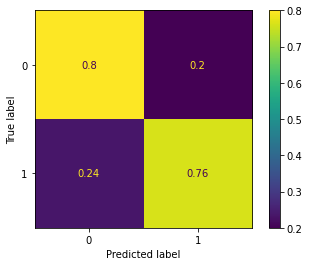

In [50]:
plot_confusion_matrix(random_forest_model, X_test, y_test, normalize = 'true')

print(classification_report(y_test, y_pred_random_model))
print(metrics.accuracy_score(y_test, y_pred_random_model))